
Training CNN Model...
Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 1s 581us/sample - loss: 0.3532 - binary_accuracy: 0.8946 - val_loss: 0.4059 - val_binary_accuracy: 0.8700
Epoch 2/10
2400/2400 [==============================] - 1s 575us/sample - loss: 0.3399 - binary_accuracy: 0.9004 - val_loss: 0.3870 - val_binary_accuracy: 0.8700
Epoch 3/10
2400/2400 [==============================] - 1s 553us/sample - loss: 0.3376 - binary_accuracy: 0.9004 - val_loss: 0.3916 - val_binary_accuracy: 0.8700
Epoch 4/10
2400/2400 [==============================] - 1s 538us/sample - loss: 0.3335 - binary_accuracy: 0.9004 - val_loss: 0.3871 - val_binary_accuracy: 0.8700
Epoch 5/10
2400/2400 [==============================] - 1s 542us/sample - loss: 0.3371 - binary_accuracy: 0.9004 - val_loss: 0.3904 - val_binary_accuracy: 0.8700
Epoch 6/10
2400/2400 [==============================] - 1s 542us/sample - loss: 0.3356 - binary_accuracy: 0.9004 - val_l

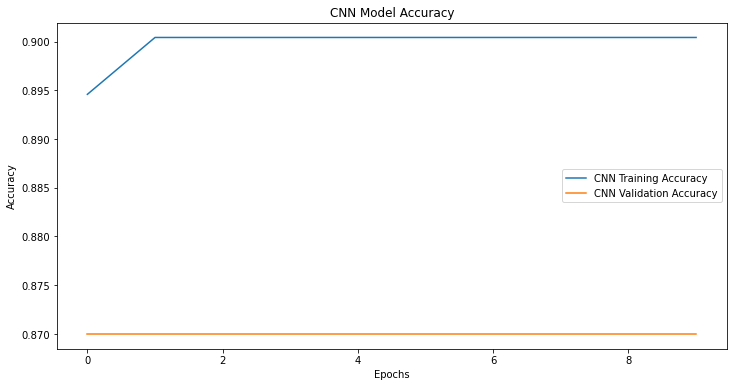

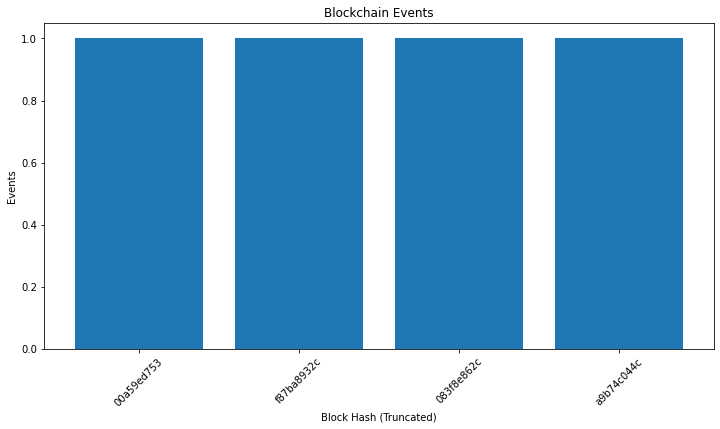


CNN Model saved as 'swiss_bank_cnn_model.h5'

Evaluating CNN Model...
600/600 [==============================] - 0s 118us/sample - loss: 0.3857 - binary_accuracy: 0.8700
CNN Test Accuracy: 0.8700

KNN Classification Report:
              precision    recall  f1-score   support

  fraudulent       0.00      0.00      0.00        78
  legitimate       0.87      0.99      0.93       522

    accuracy                           0.86       600
   macro avg       0.43      0.50      0.46       600
weighted avg       0.76      0.86      0.81       600



In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from hashlib import sha256

# Step 1: Simulate Datasets
np.random.seed(42)

# Structured dataset (e.g., transaction data)
n_samples = 3000
n_features = 10
X_structured = np.random.rand(n_samples, n_features) * 1000  # Transaction features
y_structured = np.random.choice(['legitimate', 'fraudulent'], size=n_samples, p=[0.9, 0.1])

# Image-like dataset (e.g., transaction heatmaps)
X_image = np.random.rand(n_samples, 32, 32, 1)  # 32x32 grayscale images
y_image = y_structured

# Encode labels
label_encoder = LabelEncoder()
y_structured_encoded = label_encoder.fit_transform(y_structured)
y_image_encoded = label_encoder.transform(y_image)

# Split datasets
X_train_structured, X_test_structured, y_train_structured, y_test_structured = train_test_split(
    X_structured, y_structured_encoded, test_size=0.2, random_state=42
)
X_train_image, X_test_image, y_train_image, y_test_image = train_test_split(
    X_image, y_image_encoded, test_size=0.2, random_state=42
)

# Step 2: Build and Train CNN (Image Data)
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train_image.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

print("\nTraining CNN Model...")
cnn_history = cnn_model.fit(
    X_train_image, y_train_image,
    validation_data=(X_test_image, y_test_image),
    epochs=10, batch_size=32
)

# Step 3: Build and Train KNN (Structured Data)
print("\nTraining KNN Model...")
scaler = StandardScaler()
X_train_structured_scaled = scaler.fit_transform(X_train_structured)
X_test_structured_scaled = scaler.transform(X_test_structured)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_structured_scaled, y_train_structured)

y_knn_pred = knn_model.predict(X_test_structured_scaled)
knn_accuracy = accuracy_score(y_test_structured, y_knn_pred)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")

# Step 4: Blockchain Logging
blockchain_log = []

def log_to_blockchain(event):
    """Log events to a simple blockchain."""
    if blockchain_log:
        prev_hash = blockchain_log[-1]['hash']
    else:
        prev_hash = "0" * 64
    block = {
        'data': event,
        'prev_hash': prev_hash,
        'hash': sha256((event + prev_hash).encode()).hexdigest()
    }
    blockchain_log.append(block)

# Log cybersecurity events
log_to_blockchain("Legitimate transaction detected on 2025-01-23")
log_to_blockchain("Suspicious login attempt blocked on 2025-01-23")
log_to_blockchain("Firewall rules updated on 2025-01-23")
log_to_blockchain("Fraudulent transaction detected on 2025-01-23")

# Display Blockchain Logs
print("\nBlockchain Logs:")
for block in blockchain_log:
    print(block)

# Step 5: Visualize Performance
# CNN Training Accuracy
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['binary_accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_binary_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Blockchain Visualization
plt.figure(figsize=(12, 6))
block_data = [block['data'] for block in blockchain_log]
block_hashes = [block['hash'][:10] for block in blockchain_log]  # Display truncated hash
plt.bar(range(len(block_data)), [1] * len(block_data), tick_label=block_hashes)
plt.title("Blockchain Events")
plt.ylabel("Events")
plt.xlabel("Block Hash (Truncated)")
plt.xticks(rotation=45)
plt.show()

# Step 6: Save Models
cnn_model.save('swiss_bank_cnn_model.h5')
print("\nCNN Model saved as 'swiss_bank_cnn_model.h5'")

# Step 7: Evaluate Models
print("\nEvaluating CNN Model...")
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_image, y_test_image)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

print("\nKNN Classification Report:")
print(classification_report(y_test_structured, y_knn_pred, target_names=label_encoder.classes_))
